# Case de Treino Quant.dev — Ana C. Santos

<p align='center'>
    <img src='https://www.icr.org/i/articles/af/monkey_biz_chimp_wide.jpg'>
</p>

Neste notebook você praticará técnicas que serão necessárias para desenvolver uma estratégia quantitativa de investimentos. São elas:

1. Obter dados financeiros
2. Visualização de dados financeiros
3. Cálculo de Risco e Retorno
4. Estatística
5. Processos estocásticos 
6. Portfólio de investimento
7. Gestão de Risco
8. Algotrading
9. Análise e previsão de Séries Temporais
10. Machine Learning
----
## Materiais de apoio:
1. [Coursera: Introduction to Portfolio Construction and Analysis with Python ](https://www.coursera.org/programs/universidade-de-sao-paulo-br-on-coursera-mvxtw?currentTab=MY_COURSES&productId=qeyXSV_uEeiNIQqyU-T6bA&productType=course&showMiniModal=true) 

    - Semanas 1 e 2 

2. [Playlist de Finanças Quantitativas do FEA.dev ](https://www.youtube.com/playlist?list=PLiJqHBsOKi2cabSus1hgdSNAHeU0md6_D)

3. [Extração de dados do Banco Central de forma simplificada ](https://medium.com/fea-dev/extra%C3%A7%C3%A3o-de-dados-do-banco-central-de-forma-simplificada-7b946069c03e)


4. Livros: 
    
    * _Python for Finance: Analyze Big Financial Data (segunda edição)_ (especialmente o capítulo 12)


5. Cursos do DataCamp: 
   
    - [Introduction to Portfolio Risk Management in Python ](https://learn.datacamp.com/courses/introduction-to-portfolio-risk-management-in-python)
    - [Quantitative Risk Management in Python ](https://learn.datacamp.com/courses/quantitative-risk-management-in-python)
    - [Machine Learning for Finance in Python ](https://learn.datacamp.com/courses/machine-learning-for-finance-in-python)
    - [Machine Learning for Time Series Data in Python](https://learn.datacamp.com/courses/machine-learning-for-time-series-data-in-python)


6. Extras (**Não são necessários**, apenas para motivá-los)
    - [What is Quant Finance ](https://www.youtube.com/watch?v=l7imVaK0MIQ)
    - [What is a Quant Trader? | Systematic Investing | What is a Quant Hedge Fund? | Trading Ideas](https://www.youtube.com/watch?v=EBZVtDZw9ug)
    - [The Story of James Simons - Renaissance Technologies & Medallion Fund ](https://www.youtube.com/watch?v=xkbdZb0UPac&pp=ugMICgJwdBABGAE%3D)
    - [Quants Os Alquimistas de Wall Street ](https://www.youtube.com/watch?v=ed2FWNWwE3I)
    - [Nossa planilha de recomendações (blogs, sites, canais do youtube) ](https://docs.google.com/spreadsheets/d/12YnAl8Tmd5fTDUL__3dEKsnQ1G28yKNaOLRt3Hq3aZs/edit#gid=0)
    - [What is Quantitative Finance? ](https://medium.com/swlh/what-is-quantitative-finance-193ee8788ed4#:~:text=It%20is%20a%20field%20of,trading%2C%20and%20predicting%20market%20moves)
    
    - Blog da Giant Steps
        - [O que são fundos quantitativos?](https://gscap.com.br/o-que-e-um-fundo-quantitativo/)
        - [Evolução do Mercado de Gestão Quantitativa no Brasil](https://gscap.com.br/evolucao-do-mercado-de-gestao-quantitativa-brasileiro/)
        - [Como combinar ativos de risco e criar um portfólio conservador](https://gscap.com.br/como-combinar-2-ativos-de-risco-e-deixar-uma-carteira-de-investimentos-mais-conservadora/)
        - [O que é um algoritmo de investimento?](https://gscap.com.br/o-que-e-um-algoritmo-de-investimento/)
        - [Tipos de algoritmos – Parte I: Algoritmos de Estratégia](https://gscap.com.br/tipos-de-algoritmos-parte-1-algoritmos-de-estrategia/)
        - [Tipos de Algoritmo – Parte II : A Orquestra](https://gscap.com.br/tipos-de-algoritmo-parte-ii-a-orquestra/)




----

## 0-) Bibliotecas Básicas

In [42]:
import math
import random
import pylab as py
import numpy as np
import pandas as pd
import mplfinance as mpf
from scipy.stats import skew
import statsmodels.api as sm
import pandas_datareader as dr
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

## 1-) Obter dados financeiros

Para acessar dados históricos de ativos, podemos utilizar diferentes APIs¹ com suporte ao python. Geralmente, elas nos retornam datasets no formato OHLCV (open-high-low-close-volume). Se atente para a existência de colunas como 'split' ou 'adjustment close', pois será por meio dessas informações que realizamos backtest, já que uma ação pode ter historicamente distribuído dividendos ou sofrido inplits/splits.

São alguns meios que você pode utilizar ²:
- Yahoo Finance
- Alpha vantage
- Investpy (do site investing.com)
- Quandl
- Pandas Data Reader: é uma biblioteca que permite a criação de Dataframes utilizando diferentes fontes de dados da internet, saiba que ela possui integração com algumas APIs de dados financeiros.

Pesquise sobre o funcionamento delas , como instalar (se atente aos requerimentos, caso haja conflito com seu ambiente padrão, crie um outro documento para extrair os dados), e se essas fontes estão ativas no momento ³

Observações:

1: API significa Application Programming Interface (Interface de Programação de Aplicação), são canais de trocas de informações entre sistemas. Nesse caso, são fornecidos dados financeiros de um sistema (servidor) para o seu computador

2: Ações listadas na B3 geralmente são identificadas por essas APIs pelo sufixo ".SAO" ou ".SA". Exemplo "PETR4.SAO"

3: Essa parte pode dar muita dor de cabeça, principalmente na forma como você organiza e agrupa os dados



<img src="https://i.makeagif.com/media/3-24-2016/JrSj8G.gif"></img>

### a-) Obtenha os dados diários das ações da Vale (VALE3) entre "01/01/2018" e "31/08/2021"


In [2]:
vale = dr.data.get_data_yahoo('VALE3.SA', start = '2018, 1, 1', end = '2021, 8, 31')

vale

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,41.740002,40.439999,40.439999,41.720001,14156500.0,29.179220
2018-01-03,41.880001,41.299999,41.830002,41.470001,12744200.0,29.004368
2018-01-04,42.369999,41.520000,41.810001,41.639999,18433000.0,29.123264
2018-01-05,42.290001,41.310001,41.570000,42.290001,15251300.0,29.577885
2018-01-08,43.230000,42.400002,42.400002,43.230000,14542800.0,30.235321
...,...,...,...,...,...,...
2021-08-25,100.459999,98.550003,100.089996,99.500000,15088600.0,82.522575
2021-08-26,99.800003,98.230003,99.489998,98.230003,18032300.0,81.469276
2021-08-27,101.000000,98.900002,99.010002,100.690002,19572800.0,83.509537


### b-) Obtenha dados diários de um conjunto de 10 ações (Vale, Petrobras, Klabin, Magazine Luiza, Minerva, Itaú, Bradesco, B3, Via Varejo, Ambev) entre "01/01/2018" e "31/08/2021", agrupe-as da forma que preferir

In [3]:
acoes = {'Vale': 'VALE3.SA', 'Petrobras': 'PETR4.SA', 
        'Klabin': 'KLBN4.SA', 'Magalu': 'MGLU3.SA',
        'Minerva': 'BEEF3.SA', 'Itaú': 'ITUB4.SA',
        'Bradesco': 'BBDC4.SA', 'B3': 'B3SA3.SA',
        'Via Varejo': 'VIIA3.SA', 'Ambev': 'ABEV3.SA'}

dez_acoes = pd.DataFrame()

for nome, codigo in acoes.items():
    acao = dr.data.get_data_yahoo(codigo, start = '2018, 1, 1', end = '2021, 8, 31')
    acao['Name'] = nome
    dez_acoes = pd.concat([dez_acoes, acao])
    
dez_acoes

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2018-01-02,41.740002,40.439999,40.439999,41.720001,14156500.0,29.179222,Vale
2018-01-03,41.880001,41.299999,41.830002,41.470001,12744200.0,29.004372,Vale
2018-01-04,42.369999,41.520000,41.810001,41.639999,18433000.0,29.123272,Vale
2018-01-05,42.290001,41.310001,41.570000,42.290001,15251300.0,29.577885,Vale
2018-01-08,43.230000,42.400002,42.400002,43.230000,14542800.0,30.235323,Vale
...,...,...,...,...,...,...,...
2021-08-25,17.620001,17.340000,17.500000,17.580000,13858600.0,16.919683,Ambev
2021-08-26,17.459999,17.059999,17.400000,17.110001,22172500.0,16.467337,Ambev
2021-08-27,17.180000,16.910000,17.180000,17.040001,16973500.0,16.399967,Ambev


----

## 2-) Visualização de dados financeiros

<img src='https://i.kym-cdn.com/photos/images/original/002/073/269/599'>


### a-) Faça um gráfico contendo o preço de fechamento das ações da Vale, sua média móvel dos últimos 20 dias, plote as bandas de Bollinger (dois desvios para cima e dois desvios para baixo)

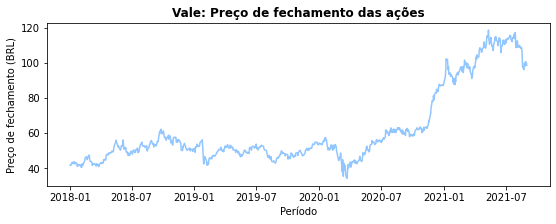

In [22]:
# Gráfico: preço de fechamento das ações da Vale

plt.style.use('seaborn-pastel')
fig, ax = plt.subplots()
fig.set_size_inches([9, 3])
ax.plot(vale['Close'])
ax.set_xlabel('Período')
ax.set_ylabel('Preço de fechamento (BRL)')
ax.set_title('Vale: Preço de fechamento das ações', fontweight = 'bold')
plt.show()

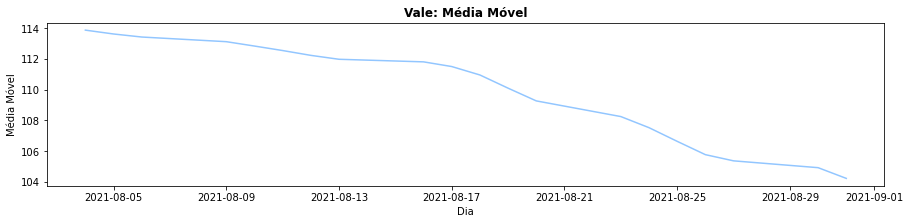

In [23]:
# Gráfico: média móvel das ações da Vale nos últimos 20 dias

vale['Média Móvel'] = vale['Close'].rolling(window = 20).mean()
vale_20_dias = vale.iloc[887:907]

plt.style.use('seaborn-pastel')
fig, ax = plt.subplots()
fig.set_size_inches([15, 3])
ax.plot(vale_20_dias['Média Móvel'])
ax.set_xlabel('Dia')
ax.set_ylabel('Média Móvel')
ax.set_title('Vale: Média Móvel', fontweight = 'bold')
plt.show()

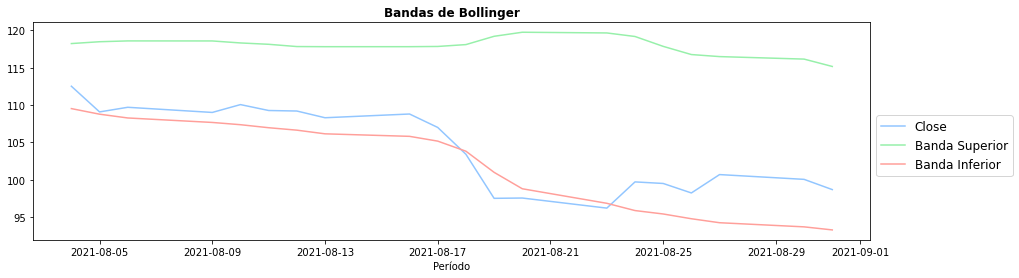

In [24]:
# Gráfico: bandas de Bollinger

vale['STD'] = vale['Close'].rolling(window = 20).std()
vale['Banda Superior'] = vale['Média Móvel'] + (vale['STD'] * 2)
vale['Banda Inferior'] = vale['Média Móvel'] - (vale['STD'] * 2)

vale_20_dias = vale.iloc[887:907]

plt.style.use('seaborn-pastel')
fig, ax = plt.subplots()
fig.set_size_inches([15,4])

ax.plot(vale_20_dias['Close'])
ax.plot(vale_20_dias['Banda Superior'])
ax.plot(vale_20_dias['Banda Inferior'])

ax.set_xlabel('Período')
ax.set_title('Bandas de Bollinger', fontweight = 'bold')

leg = ax.legend(('Close', 'Banda Superior', 'Banda Inferior'), bbox_to_anchor = (1, 0.6), fontsize = 12)
plt.show()

### b-) Faça um gráfico contendo o preço de fechamento (ajustado) três ativos extraídos por você anteriormente

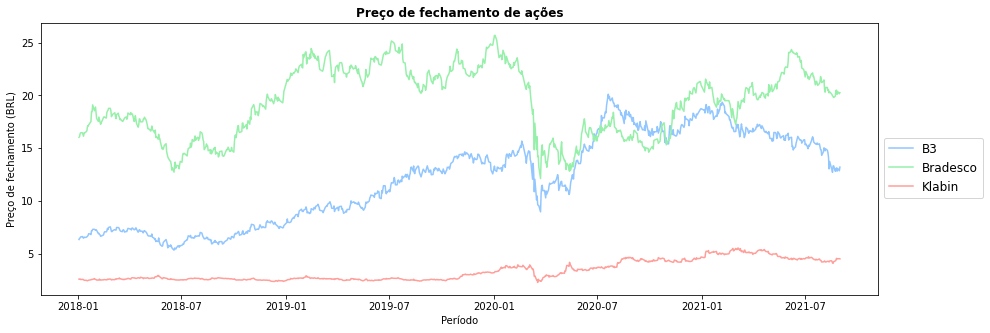

In [12]:
tres_ativos = np.random.choice(list(acoes.keys()), 3, replace = False)

ativo_1 = dez_acoes.loc[dez_acoes['Name'] == tres_ativos[0]]
ativo_2 = dez_acoes.loc[dez_acoes['Name'] == tres_ativos[1]]
ativo_3 = dez_acoes.loc[dez_acoes['Name'] == tres_ativos[2]]

plt.style.use('seaborn-pastel')
fig, ax = plt.subplots()
fig.set_size_inches([15, 5])

ax.plot(ativo_1['Adj Close'])
ax.plot(ativo_2['Adj Close'])
ax.plot(ativo_3['Adj Close'])

ax.set_xlabel('Período')
ax.set_ylabel('Preço de fechamento (BRL)')
ax.set_title('Preço de fechamento de ações', fontweight = 'bold')

leg = ax.legend(tres_ativos, bbox_to_anchor = (1, 0.6), fontsize = 12)
plt.show()

### c-) Faça um gráfico contendo o preço de fechamento das ações da Vale e seu volume (repare que o nível de grandeza entre as unidades é diferente, procure um jeito que não altere as proporções do gráfico)

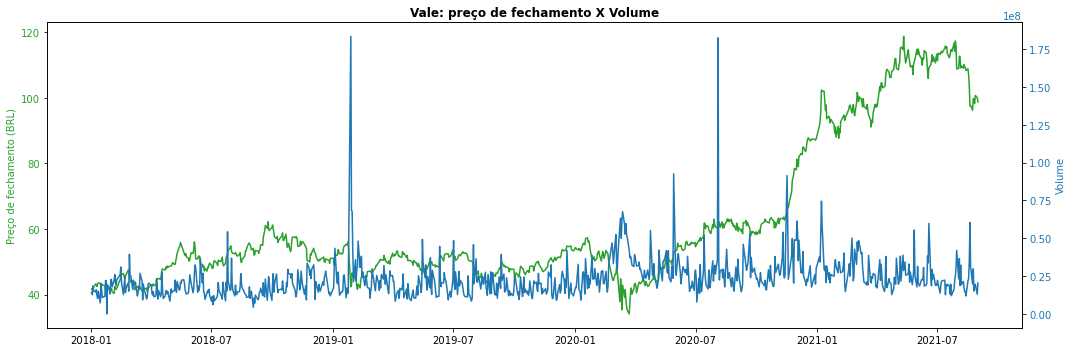

In [7]:
plt.style.use('seaborn-pastel')
fig, ax1 = plt.subplots()
fig.set_size_inches([15, 5])

color = 'tab:green'
ax1.plot(vale['Close'], color = color)
ax1.set_ylabel('Preço de fechamento (BRL)', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(vale['Volume'], color = color)
ax2.set_ylabel('Volume', color = color) 
ax2.tick_params(axis = 'y', labelcolor = color)

plt.title('Vale: preço de fechamento X Volume', fontweight = "bold") 
fig.tight_layout() 
plt.show()

### d-) Faça um gráfico candle stick das ações da Vale

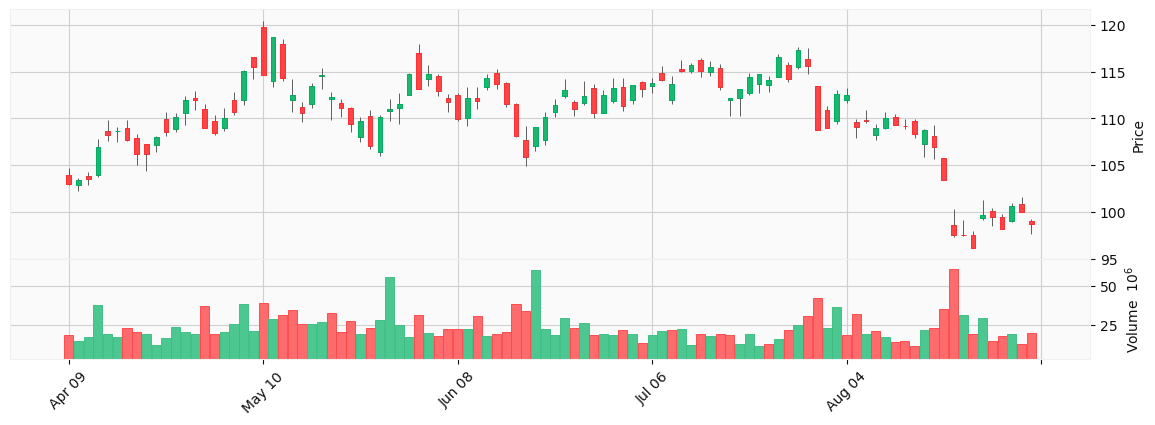

In [307]:
mpf.plot(vale.tail(100), type = 'candle', figsize = (15,5), volume = True, style = 'yahoo')

### e-) Faça um gráfico de dispersão entre dois ativos

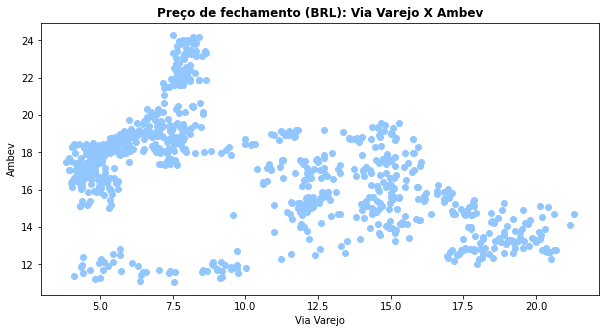

In [81]:
dois_ativos = np.random.choice(list(acoes.keys()), 2, replace = False)

ativo_01 = dez_acoes.loc[dez_acoes['Name'] == dois_ativos[0]]
ativo_02 = dez_acoes.loc[dez_acoes['Name'] == dois_ativos[1]]

plt.style.use('seaborn-pastel')
fig, ax = plt.subplots()
fig.set_size_inches([10, 5])

ax.scatter(ativo_01['Close'], ativo_02['Close'])

ax.set_xlabel(str(dois_ativos[0]))
ax.set_ylabel(str(dois_ativos[1]))
ax.set_title(f'Preço de fechamento (BRL): {dois_ativos[0]} X {dois_ativos[1]}', fontweight = 'bold')

plt.show()

----


## 3-) Cálculo de Métricas de risco e retorno
<img src='https://thumbs.gfycat.com/HiddenHopefulDuckbillplatypus-size_restricted.gif'>



## __Retornos Discretos__

Há diferentes maneiras que o retorno pode ser representado.

__a-) Retornos Brutos (_Gross Returns_)__

$R_{t+1}= \frac{P_{t+1}}{P_t}$

* ${P_t}$ : preço do ativo no t + 1
* $P_{t+1}$ : preço do ativo no início do período
* $t$: período inicial

obs1: a notação do período pode mudar, em alguns materiais a fórmula o representa por  $\frac{P_{t}}{P_t-1}$ . O princípio é o mesmo, posterior no numerador e anterior no denominador

obs2:  Caso seja um ativo que pague dividendo, a fórmula será a seguinte:

$R_{t+1}= \frac{P_{t+1} + D_{t+1}}{P_t}$

obs3:  Essa fórmula assume que o preço do ativo pode ser medido, o que nem sempre é verdade, dado o caso de ativos ilíquidos (isso não será importante para o case e talvez não muito importante para o andar de seus estudos, apenas saiba disso) 

O Retorno Acumulado pode ser calculado pelo produto de uma série de retornos brutos, por exemplo:

$Rcum_{t+3} = R_{t+1} + R_{t+2} R_{t+3}$




__b-) Retornos Aritméticos (_Arithmetic Returns_) ou retornos simples (_“simple returns_) ou retornos líquidos__

$r_{t+1}= R_{t+1} - 1$

* $r_{t+1}$ : retorno aritmético
* $ R_{t+1}$: retorno bruto

Nesse caso, o retorno acumulativo é calculado, por exemplo: 

$Rcum_{t+3} = (1-r_{t+1})*(1-r_{t+2})*(1-r_{t+3})$

Não há a propriedade aditiva entre os retornos  
$(1-r_{t+1})(1-r_{t+2})(1-r_{t+3})$ ≠ $1 + (r_{t+1}) (r_{t+2}) (r_{t+3})$

No entanto há propriedade aditiva entre ativos quando calculamos o retorno de um portfólio (veremos mais para frente). Como exemplo, em um portfólio com ativos igualmente balanceados __A__ e __B__, seu retorno será dado por

$r^{p}_{t+1} = 0.5r^{A}_{t+1} + 0.5r^{B}_{t+1} $

### __Retornos logarítmicos__

$rlog_{t+1} =ln(\frac{P_{t+1}}{P_t})= ln(P_{t+1}) - ln(P_{t})  =ln(R_{t+1}) = ln(1+ r_{t+1})$

* $rlog$: retorno logarítmico 

Para transformar em retorno bruto, basta fazer a seguinte conta:

$R_{t+1}= exp({rlog}_{t+1})$

Para transformar em retorno aritmético, basta :

$r_{t+1}= 1 - exp({rlog}_{t+1})$

O retorno logarítmico acumulado é dado por:

$Rlncum_{t+3} = exp({rlog}_{t+1} + {rlog}_{t+2}+ {rlog}_{t+3}) = exp(rlog_{t+1})+ exp(rlog_{t+2})+ exp(rlog_{t+3})$

obs4: Retornos logarítmicos não se agregam entre ativos

$r^{p}_{t+1} = ln(0.5exp({rlog}^{A}_{t+1}) + 0.5exp({rlog}^{B}_{t+1})) $




### a-) Calcule o retorno  total (entre o valor final e o valor do começo) , pelo formato discreto (simples) e logarítmico das ações da Vale

In [8]:
# Vale: retorno total pelo formato discreto (simples)
retorno_total_simples = round(((vale.iloc[906, 3]/vale.iloc[0, 3]) - 1), 4)
print(f'O retorno total pelo formato simples é {retorno_total_simples}.')

# Vale: retorno total pelo formato logarítmico
retorno_total_log = round((np.log(1 + retorno_total_simples)), 4)
print(f'O retorno total pelo formato logarítmico é {retorno_total_log}.')

O retorno total pelo formato simples é 1.3653.
O retorno total pelo formato logarítmico é 0.8609.


### b-) Calcule o retorno  diário ao longo de todo o período, pelo formato discreto (simples) e logarítmico das ações da Vale

In [9]:
# Vale: retorno diário pelo formato discreto (simples)
retorno_diario_simples = 1
serie_simples_retorno = [] 

for i in list(range(906)):
    retorno_dia_simples = ((vale.iloc[(i + 1), 3])/(vale.iloc[i, 3])) - 1
    serie_simples_retorno.append(retorno_dia_simples)
    retorno_dia_simples_acumulativo = 1 - retorno_dia_simples
    retorno_diario_simples = retorno_diario_simples * retorno_dia_simples_acumulativo
    
print(f'O retorno diário ao longo do período pelo formato simples é {round(retorno_diario_simples, 4)}.')

# Vale: retorno diário pelo formato logarítmico
retorno_diario_log = math.exp(((np.log(1 + np.array(serie_simples_retorno))).sum()))

print(f'O retorno diário ao longo do período pelo formato logarítmico é {round(retorno_diario_log, 4)}.')

O retorno diário ao longo do período pelo formato simples é 0.2236.
O retorno diário ao longo do período pelo formato logarítmico é 2.3653.


### c-) Faça um gráfico da série de log-retornos

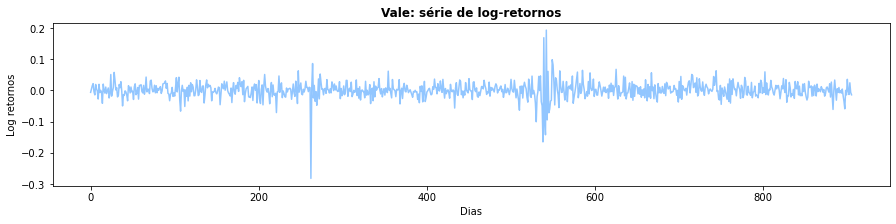

In [10]:
serie_log_retorno = np.log((1 + np.array(serie_simples_retorno)))

grafico = []
for log in serie_log_retorno:
    grafico.append(math.exp(log))
    
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots()
fig.set_size_inches([15, 3])
ax.plot(serie_log_retorno)
ax.set_xlabel('Dias')
ax.set_ylabel('Log retornos')
ax.set_title('Vale: série de log-retornos', fontweight = 'bold')
plt.show()

## Volatilidade

<p align='center'>
"Volatilidade é risco, mas não é todo o risco." (Desconhecido)
</p>




Uma das mais tradicionais, e simplistas, formas de se representar o risco em finanças é pelo desvio padrão dos retornos, chamada também de _Close-to-close volatility_ ou _historical Volatility_:

$\sigma =  \sqrt{\frac{\sum{}^N_{i}(r_{i} - \bar{r})²}{N-1}} $

Anualizando a fórmula:

$\sigma_{a}=\sigma_{d} * \sqrt{252} $


Há alternativas para se mensurar a volatilidade, são elas
* _Desvio padrão móvel_ ou _Desvio padrão corrido_
* _Média Móvel Simples (Simple Moving Average - SMA)_
* _Média Móvel Poderada Exponêncial (Exponentially Weighted Moving Average - EWMA)_
* _Semi-desvio (Semi deviation)_: volatilidade de uma subamostra de retornos negativos
* Outras medidas mais complexas como:
    * Parkinson Volatility
    * Garman Klass Volatility
    * Rogers-Satchell Volatility
    * Yang Zhang Volatility

...

Outras fontes:

* https://www.ivolatility.com/help/6.html#sma
* https://portfolioslab.com/tools

### Calcule a volatilidade nas formas: histórica (retornos diários), histórica anualizada,  semi-std, SMA e EWMA

In [20]:
# Volatidade: forma histórica (retornos diários)

volatilidade_diaria = round(((np.array(grafico)).std()), 4)

print(f'A volatidade da Vale na forma histórica (retornos diários) é de {volatilidade_diaria}.')

A volatidade da Vale na forma histórica (retornos diários) é de 0.0264.


In [21]:
# Volatidade: forma histórica anualizada

volatilidade_anual = volatilidade_diaria * (252 * (1 ** (1/2))) 

print(f'A volatidade da Vale na forma histórica anualizada é de {volatilidade_anual}.')

A volatidade da Vale na forma histórica anualizada é de 6.6528.


In [45]:
# Volatidade: forma semi-std

grafico_np = np.array(grafico)
retornos_abaixo_media = np.where(grafico_np < grafico_np.mean(), grafico_np, 0)

print(f'A volatidade da Vale na forma semi-std é de {round((retornos_abaixo_media.std()), 4)}.')

A volatidade da Vale na forma semi-std é de 0.492.


In [32]:
# Volatidade: forma média móvel simples (SMA)

print(f'A volatidade da Vale na forma média móvel simples (SMA) é de {round((np.array(grafico)).mean(), 4)}.')

A volatidade da Vale na forma média móvel simples (SMA) é de 1.0013.


In [99]:
# Volatidade: forma média móvel ponderada exponêncial (EWMA)

df = pd.DataFrame(grafico_np)
EWMA = df.ewm(span = 2).mean()

num = 1
for i in list(range(906)):
    num = num * EWMA.iloc[i, 0]

print(f'A volatidade da Vale na forma média móvel ponderada exponêncial (EWMA) é de {round(num, 4)}.')

A volatidade da Vale na forma média móvel ponderada exponêncial (EWMA) é de 2.8328.


### __Desafio__: escolha uma das formas mais "complexas" e calcule a volatilidade

In [8]:
# Volatividade: Yang Zhang

open = []
hight = []
low = []
close = []

for i in list(range(906)):
    open.append(math.exp(vale.iloc[i, 2]/vale.iloc[(i - 1), 3]))
    hight.append(math.exp(vale.iloc[i, 0]/vale.iloc[i, 2]))
    low.append(math.exp(vale.iloc[i, 1]/vale.iloc[i, 2]))
    close.append(math.exp(vale.iloc[i, 3]/vale.iloc[i, 2]))

rs = (np.array(hight) * (np.array(hight) - np.array(close))) + (np.array(low) * (np.array(low) - np.array(close)))
rogers_satchell = math.sqrt(rs.mean())

open_std = np.array(open).std()
close_std = np.array(close).std()
k = 0.34/(1.34 + ((len(vale) + 1)/(len(vale) - 1)))

yang_zhang = math.sqrt((open_std ** 2) + (k * (close_std ** 2)) + ((1 - k) * (rogers_satchell ** 2)))

print(f'A volatidade da Vale na forma Yang Zhang é de {round(yang_zhang, 4)}.')

A volatidade da Vale na forma Yang Zhang é de 0.0685.


----

## 4-) Estatística

<img src = "https://www.meme-arsenal.com/memes/e67609cded2cb9c7f9f120ffc8a0e5ea.jpg" >

<p align='center'>
    "As estatísticas corretas nos deixam sempre uma falsa impressão" - Stanislaw Ponte Preta, pseudônimo do Jornalista Sérgio Porto (1923-1968)
</p>

<p align='center'>    
    "Usa-se a estatística como um homem bêbado usa um poste, mais para apoiar que para iluminar" - Andrew Lang (1844-1912)
</p>

<p align='center'>    
    "I can prove anything by statistics except the truth." - George Canning
</p>





Estatística é uma área extremamente ampla, cujas ferramentas são primordiais para as Finanças ao embasarem diversas teorias, conceitos e fórmulas. Além disso, modelos estatísticos mais avançados são a base do Aprendizado de Máquinas (ou Aprendizado Estatístico), o qual encontra cada vez mais espaço nas finanças e possibilita estratégias de investimentos sistemáticos. Encontraremos alguns de suas apliações nos próximos desafios, por agora iremos focar em testar a normalidade dos retornos. 



Para isso é necessário ter em mente o conceito de __distribuição normal__ e desvios da normalidade, como __skewness__ e __kurtosis__. É importante lembrar que,por mais imperfeito que isso possa parecer, a ideia de que os retornos de instrumentos financeiros seguem uma distribuição normal embasa diversas teorias como 

* Teoria das Carteiras 
* Modelo de precificação dos ativos (Capital Asset Pricing Model - CAPM)
* Hipótese dos Mercados Eficientes (Efficient Market Hypotesis - EMH)
* Precificação de Opções

obs: recomendo utilizarem os pacotes  __statsmodels.api__ e __scipy.stats__ 

### a-) Uma forma de checarmos graficamente se os retornos seguem uma distribuição normal é fazendo o histograma dos log-retornos. Para as ações da Vale, do Itaú, da Klabin e da Minerva; faça  um histograma 


Dica: utilize a função do matplotlib da seguinte maneira __plt.hist(log_returns.flatten(), bins = 70, normed = True, label = 'frequency', color = 'b')__

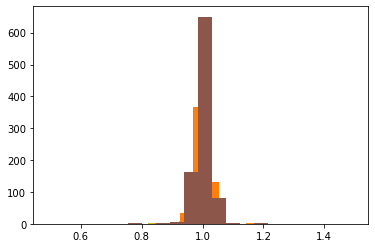

In [54]:
# Vale: histograma dos log-retornos

daily_return_vale = 1
daily_return_series_vale = []
daily_log_returns_vale = []

vale_values = dez_acoes.loc[dez_acoes['Name'] == 'Vale']

for i in list(range(906)):
    day_vale = ((vale_values.iloc[(i + 1), 3])/(vale_values.iloc[i, 3])) - 1
    daily_log_returns_vale.append(math.exp(np.log((1 + np.array(day_vale)))))
    daily_cum_vale = 1 - day_vale
    daily_return_vale = day_vale * daily_cum_vale
    plt.hist(daily_log_returns_vale)

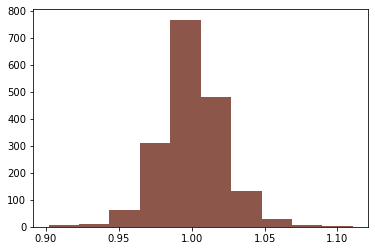

In [55]:
# Itaú: histograma dos log-retornos

daily_return_itau = 1
daily_return_series_itau = []
daily_log_returns_itaue = []

itau_values = dez_acoes.loc[dez_acoes['Name'] == 'Itaú']

for i in list(range(906)):
    day_itau = ((itau_values.iloc[(i + 1), 3])/(itau_values.iloc[i, 3])) - 1
    daily_log_returns_itau.append(math.exp(np.log((1 + np.array(day_itau)))))
    daily_cum_itau = 1 - day_itau
    daily_return_itau = day_itau * daily_cum_itau
    plt.hist(daily_log_returns_itau)

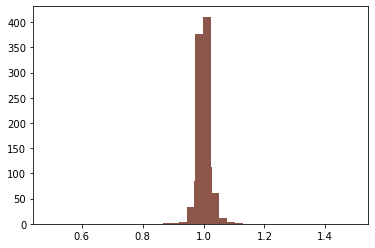

In [56]:
# Klabin: histograma dos log-retornos

daily_return_klabin = 1
daily_return_series_klabin = []
daily_log_returns_klabin = []

klabin_values = dez_acoes.loc[dez_acoes['Name'] == 'Klabin']

for i in list(range(906)):
    day_klabin = ((klabin_values.iloc[(i + 1), 3])/(klabin_values.iloc[i, 3])) - 1
    daily_log_returns_klabin.append(math.exp(np.log((1 + np.array(day_klabin)))))
    daily_cum_klabin = 1 - day_klabin
    daily_return_klabin = day_klabin * daily_cum_klabin
    plt.hist(daily_log_returns_klabin)

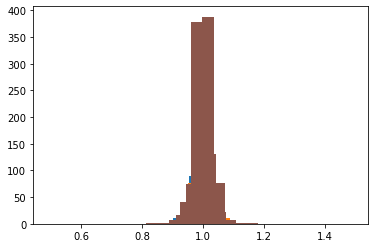

In [57]:
# Minerva: histograma dos log-retornos

daily_return_minerva = 1
daily_return_series_minerva = []
daily_log_returns_minerva = []

minerva_values = dez_acoes.loc[dez_acoes['Name'] == 'Minerva']

for i in list(range(906)):
    day_minerva = ((minerva_values.iloc[(i + 1), 3])/(minerva_values.iloc[i, 3])) - 1
    daily_log_returns_minerva.append(math.exp(np.log((1 + np.array(day_minerva)))))
    daily_cum_minerva = 1 - day_minerva
    daily_return_minerva = day_minerva * daily_cum_minerva
    plt.hist(daily_log_returns_minerva)

### b-) Outro teste gráfico é o Quantile-Quantile plots, ou QQ-plots. Procure saber sobre sua explicação. Escolha uma ação e faça uma "Plotagem"

['Via Varejo']


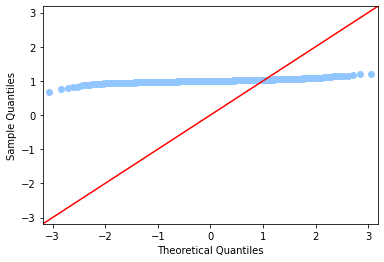

In [36]:
ativo = np.random.choice(list(acoes.keys()), 1, replace = False)

ativo_qq_plot = dez_acoes.loc[dez_acoes['Name'] == ativo[0]]

daily_return = 1
daily_return_series = []
daily_log_returns = []

for i in list(range(906)):
    day = ((ativo_qq_plot.iloc[(i + 1), 3])/(ativo_qq_plot.iloc[i, 3])) - 1
    daily_log_returns.append(math.exp(np.log((1 + np.array(day)))))
    daily_cum = 1 - day
    daily_return = day * daily_cum

print(ativo)
sm.qqplot(np.array(daily_log_returns), line = '45')
py.show()

### c-) Visualizações gráficas não são suficientes. Calcule um conjunto de estatísticas (recomendo fazer uma função), contendo o tamanho da amostra, mínimo, máximo, média, desvio padrão, skew e kurtosis; para duas ações de sua escolha. Compare os valores

In [47]:
dois_ativos = np.random.choice(list(acoes.keys()), 2, replace = False)

def statistics(acao):
    tamanho = acao.shape
    minimo = acao.min()
    maximo = acao.max()
    media = acao.mean()
    desvio = acao.std()
    skew_ativo = skew(acao)
    kurtosis_ativo = kurtosis(acao, fisher = True)
    return tamanho, minimo, maximo, media, desvio, skew_ativo, kurtosis_ativo

daily_return_ativo = 1
daily_return_series_ativo = []
daily_log_returns_ativo = []

for ativo in dois_ativos:
    ativo_escolhido = dez_acoes.loc[dez_acoes['Name'] == ativo]
    
    for i in list(range(906)):
        day_ativo = ((ativo_escolhido.iloc[(i + 1), 3])/(ativo_escolhido.iloc[i, 3])) - 1
        daily_log_returns.append(math.exp(np.log((1 + np.array(day_ativo)))))
        daily_cum_ativo = 1 - day_ativo
        daily_return_ativo = day_ativo * daily_cum_ativo
        print(statistics(daily_return_ativo))

((), 0.008981389026743126, 0.008981389026743126, 0.008981389026743126, 0.0, 0.0, -3.0)
((), 0.0017931071917009903, 0.0017931071917009903, 0.0017931071917009903, 0.0, 0.0, -3.0)
((), 0.005941581050908139, 0.005941581050908139, 0.005941581050908139, 0.0, 0.0, -3.0)
((), 0.011742367048877479, 0.011742367048877479, 0.011742367048877479, 0.0, 0.0, -3.0)
((), 0.0, 0.0, 0.0, 0.0, 0.0, -3.0)
((), -0.013688065898173963, -0.013688065898173963, -0.013688065898173963, 0.0, 0.0, -3.0)
((), 0.026068283927394183, 0.026068283927394183, 0.026068283927394183, 0.0, 0.0, -3.0)
((), 0.0028901051563547816, 0.0028901051563547816, 0.0028901051563547816, 0.0, 0.0, -3.0)
((), 0.002881886203227351, 0.002881886203227351, 0.002881886203227351, 0.0, 0.0, -3.0)
((), 0.016992042489450306, 0.016992042489450306, 0.016992042489450306, 0.0, 0.0, -3.0)
((), 0.03860849969524547, 0.03860849969524547, 0.03860849969524547, 0.0, 0.0, -3.0)
((), -0.007683488571803767, -0.007683488571803767, -0.007683488571803767, 0.0, 0.0, -3.0

### d-) Faça testes estatísticos de signficância estatística para as ações que escolheu anteriormente. Eles podem ser obtidos pelas funções do scipy.stats:

* skewtest()
* kurtosistest()
* normaltest()

obs:os retornos __não__ são normalmente distribuídos caso o valor-p for abaixo de 0.05


Responda, posteriormente, se os retornos das ações escolhidas são normalmente distribuídos

----

## 5-) Processos estocáticos  


<img src = 'http://media3.giphy.com/media/YPBvdXHxANHHi/giphy.gif'>


<p align='center'>
"Predictability is not how things will go, but how they can go"- Raheel Farooq
</p>


<p align='center'>
"A fortuna troca, às vezes, os cálculos da natureza" - Machado de Assis (1839-1908)
</p>


### Introdução

Um processo estocástico, a grosso modo, é uma sequência de variáveis aleatórias. A palavra estocástica significa probabilística, oposta à Ao palavra determinística em que por meio de uma equação é possível saber o resultado exato (pense numa equação y = ax + b, caso conhecermos todos os parâmetros, a partir de uma observação de x poderemos __determinar__ o y).

Caso queira saber mais (não será necessário para resolver o exercício), acesse os links:

* [Cadeias de Markov: Caminhadas aleatórias (Teoria e Simulação) - Aula 3](https://www.youtube.com/watch?v=cwhQYqR_Iag&list=PLSc7xcwCGNh0jSylDm0QrDJaFTC3vAbvc&index=5) 
* [O que são processos estocásticos?](https://www.youtube.com/watch?v=WOWi6dswgkY&list=PLSc7xcwCGNh0jSylDm0QrDJaFTC3vAbvc&index=1)

Dentro desse assunto temos o conceito de "passeios aleatórios", que são objetos matemáticos cujos caminhos consistem em, como o próprio nome sugere, uma sucessão de movimentos aleatórios, podendo representar o deslocamento de uma molécula em um gás, processos de difusão de partículas, o andar de um bêbado, ou o comportamento de ativos no mercado financeiro, já que eles sofrem diversas influências externas, fazendo seu movimento ser entendido como aleatório (tornando-os difíceis de serem previstos).

### a-) Gere uma série de retornos "previstos" por uma caminhada aleatória 

----

## 6-) Portfólio de investimento



### Métricas de desempenho de uma carteira de investimentos

__Retorno__:  

No tópico 2, já vimos como calcular o retorno de um portfólio com dois  ativos. Segue a generalização:

$R_p = R_{a1}w_{a1} + R_{a2}w_{a2} + R_{a3}w_{a3} + ...+ R_{an}w_{an}$

* $R_p$: retorno do portfólio
* $R_{an}$: retorno do ativo "n"
* $w_{an}$ : peso do ativo "n"

Uma maneira mais eficiente de generalizá-la é através da fórmula matricial, dada por: 
$R_p = \vec{r} \times \vec{w}$

* $\vec{r}$ : vetor contendo o retorno dos ativos
* $\vec{w}$ : vetor contendo o peso dos ativos na carteira

obs: a soma dos pesos precisa ser igual a 1, por hora, assuma que os pesos não podem ser negativos (não estaremos vendidos em nenhuma ação, apenas comprados)
 

__Volatilidade__:

Contraintuitivamente, a volatilidade de um portfólio não é calculada a partir do desvio padrão de seus retornos. Sua fórmula (matricial) é a seguinte:

$\sigma_{P} = \sqrt{w_{T} \cdot \Sigma{}  \cdot w}$


* $\sigma_{P}$ : volatilidade do portfólio
* $\Sigma$ : matriz de covariância dos retornos
* $w$: pesos dos ativos
* $w_{T}$: peso dos ativos transpostos

### Você deverá montar um portfólio com 10 ações. Como você já sabe importar dados financeiros, fique livre para escolher os ativos/ações de seu preferência,  
designando os pesos para cada um dos ativos ou optand. 

### a-) Calcule o retorno anualizado do portfólio

### b-) Calcule a volatilidade anualizada do portfólio

### c-) Calcule os retornos diários do portfólio, calcule seu retorno acumulativo e compare com algum Benchmark (CDI, IBOVESPA, IBrX)

### d-) Provavelmente já deve ter se deparado com o conceito de correlação em estatística. Faça a matriz de correlação (método de person) para os ativos do portfólio que montou. Com o intuito de aumentar a elegância, faça um heatmap dessa matriz.Por fim, reflita o que a correlação entre os ativos pode dizer sobre seu portfólio. Para ajudar na sua reflexão fique com a frase de Harry Markowitz: “Tratando-se de finanças, diversificação é o único almoço grátis”

### Teoria moderna das carteiras (Modern Portfolio Theory - MPT)

__Pressupostos__:

* Não é possível estar vendido em uma ação (short)
* 100% da riqueza do invstidor necessita estar depositada (soma dos pesos igual a 1)
* _Trade-off_ entre risco e retorno: maior incerteza (risco) é compensada com maior recompensa (retorno)
* Retorno Esperado no futuro: média do retorno histórico (conceito de esperança matemática) 

__Explicação básica__:

* Podemos compor diversos portfólios diferentes ao alterarmos o peso dado aos ativos
* Diferentes pesos resultam em diferentes pares (risco, retorno)
    * Mudar os pesos = ajustar a exposição do investidor ao risco  
* O desafio é: encontrar uma combinação de pesos para maximizar o retorno, dado um nível de risco
    *  Tal combinação resulta em um __portfólio eficiente__
* A região do gráfico (retorno esperado, vol) onde se encontram os portfólios eficientes é chamada de fronteira eficiente


### e-) Plote um gráfico contendo a relação riscoXretorno de diversos portfólios possíveis. Evidencie a Fronteira eficiente

### Extra: reflita sobre quais os problemas e limitações da teoria de Markowitz (pesquise à vontade)

----

## 7-) Gestão de Risco

<p align='center'>
"Um navio no porto está em segurança, mas não é para isso que os navios são feitos" - John Sheed
</p>

<p align='center'>
"O pior risco é não correr risco nenhum" - Nicolas Sarcozy
</p>

<p align='center'>
"Há duas ocasiões na vida em que uma pessoa não deve jogar: quando não tiver posse para isso ... e quando tiver" - Mark Twain
</p>

Como você já deve saber, risco em finanças emerge da incerteza de futuros lucros ou retornos. A Gestão de risco financeiro moderna é algo extremamente objetivo. Por mais que sejam utilizados ferramentais matemáticos e estatísticos (tomando um caráter científico), modelos de risco sempre estão sujeitos a serem aplicados incorretamente, a terem pressupostos errados ou a empresentarem resultados ruins. Nessa etapa você aplicará algumas dessas ferramentas mais básicas .





### DRAWDOWN

Para melhor avaliar o desempenho de um portfólio, é necessário calcular o Drawdown Histórico. Sua fórmula é dada por:

$DD = \frac{r_t}{RM}-1$

sendo:
*  $r_t$ o retorno acumulado até o momento t e RM o máximo até o momento

O objetivo de toda estratégia de investimentos é apresentar o menor Drawdown histórico possível. Você deverá  analisar o Drawdown histórico da carteira que você montou na última etapa (suponha desembolsou R$100.000,00 nessa estratégia). Para isso, plote um gráfico que informe sobre essa medida de risco e responda:

* a-) Qual foi o patrimônio mínimo
* b-) Qual foi a maior queda do patrimônio em R$
* c-) Qual foi a maior queda percentual do patrimônio
* d-) A data da maior queda
* e-) A maior duração do Drawdown

### Value at Risk (VaR)

Outra forma para medir o rico de perda é a ferramente chamada de Value at Risk (VaR). Há diversos tipos de VaR, mas seu princípio é representar, em um número, o risco de um produto financeiro ou de uma carteira relacionado a sua __perda potencial máxima__ para um __dado horizonte__ e com um __intervalo de confiança__ (normalmente 95%, 97,5%, 99%, 99.9%), ou seja, é o risco de enventos extremos na distribuição de perdas (retornos negativos).

### a-)  Calcule o VaR histórico do portfólio montado na etapa 5. Considere os intervalos de confiança 95%, 97,5%, 99%, 99.9%

### b-) Faça um histograma da distribuição dos retornos, indicando a linha vertical que delimita o var VaR como

obs: também podemos fazer o grafíco contendo a distribuição das perdas (oposto do retorno), ou seja :

$L = - R$ 

### CVaR:

O Conditional Value at Risk é variação do VaR, porém ele procura mensurar a perda esperada nos piores 1-x% cenários. Em outras palavras, um CVaR(95), por exemplo, busca responder o quanto excederiam as perdas __em média__ nos 5% piores casos. 

Estatísticamente, ele é a esperança matemática da cauda da distribuição de perdas

$CVaR(\alpha) := \frac{1}{1-\alpha} \mathbb{E} \int_{VaR(\alpha)}^{\bar{x}} xf(x)dx$

sendo: 

* $f(.)$ : função densidade de probabilidade (probability density function - pdf)
* $\bar{x}$: limite superior (pode ser infinito)
* $VaR(\alpha)$ : VaR em um intervalo de confiança de $\alpha$


<img src ='https://www.researchgate.net/publication/321925061/figure/fig1/AS:573442517934080@1513730758570/represents-the-CVaR-in-terms-of-costs.png'>


### c-) Compute o o CVaR histórico (não é necessário modelar os retornos como uma distribuição normal) nos 5% piores casos. 



### VaR Paramétrico e não Paramétrico

* "VaR Paramétrico baseia-se no conhecimento prévio de uma distribuição estatística (Ex.: Curva Normal) para fazer o cálculo das perdas financeiras com base em hipótese de comportamento da distribuição de probabilidades dos retornos dos ativos. "

* "O VaR Não Paramétrico não faz hipótese alguma sobre a distribuição de probabilidade dos retornos dos ativos. Nestas técnicas (Ex.: Simulação Histórica, Simulação de Monte Carlo) são utilizadas a história dos próprios retornos para obtenção de informações sobre as perdas financeiras"

fonte :
[Value at Risk - wikipedia (link)](https://pt.wikipedia.org/wiki/Value_at_Risk)


Nessa etapa não haverá exercícios , repare até agora você só calculou medidas paramétricas, já que não fora exigido que se modelasse a série de perdas (assumindo uma distribuição específica). Realize as versões paramétricas para o VaR e o CVaR, assumindo uma distribuição normal.


Dica:
```{python} 
from scipy.stats import norm 
```

----

----

## 8-) Algotrading


<div style="font-style: italic; text-align: center;" markdown="1">
People worry that computers will get too smart and take over the world, but the real problem is that they’re too stupid and they’ve already taken over the world - Pedro Domingos 

</div>

Uma das áreas que podemos seguir dentro do grupo de finanças quantitativas é a elaboração de algoritmos (procedimentos feitos pelo computador) que realizem estratégias de trading cuja performance for previamente avaliada por backtests. 

Uma ideia extremamente simples (e ingênua) é desenvolver estratégias de trading baseadas no cruzamento de médias móveis (simples) dos preços dos ativos (sendo uma delas uma média móvel curta e outra longa). Com o intuito de treinar o raciocínio para esse assunto, você terá que implementar uma seguinte estratégia:



* "Quando a média móvel curta estiver maior que a média móvel, longa deve-se permanecer comprado. Quando ocorrer o contrário, deve-se permanecer vendido"



Leia o segundo tópico (__"Strategies Based on Simple Moving Averages"__) do livro (__Python for Algorithmic Trading - From Idea to Cloud Deployment__, de Yves Hilpisch)

### a-) Nesse exercício, adote a média móvel curta com 42 dias e a longa com 252. Faça o backtest nas ações da Minerva (BEEF3), com início em 1/01/2015 até 31/08/2020. Faça gráficos para ilustrar a estratégia

### b-) Resolvida essa parte, você já sabe como é que calculado o retorno de uma estratégia. Em seguida, há um DataFrame de uma estratégia aplicada às ações da Ambev. Apenas calcule o retorno da estratégia e avalia se ela seria vantajosa ou não (colocaria seu dinheiro nela ?), já atento que ela terá um forte drawdown no período da pandemia , imagine que houvesse um "stoploss". Depois você saberá o que tem por trás dessa estratégia e como ela foi elaborada 

In [ ]:
import pandas as pd
estrat_secreta = pd.read_csv('estratégia_secreta.csv',index_col=0,parse_dates=True)

Em suma, para desenvolvermos uma estratégia, devemos criar uma regra, que será identificada como um sinal (comprado ou vendido). Para calcular seu retorno histórico, multiplicamos o sinal por o retorno do ativo em questão.  Percorremos esse assunto de forma bem simplificada, há vieses que precisamos nos atentar, sempre temos melhores métodos de se fazer um backtest, podemos utilizar ferramentais estatísticos para comprovar um "alfa", além de que devemos nos atentar que  a execução de uma estratégia talvez não seja viável (produtos disponíveis na corretora, capacidade de executar uma ordem de compra ou venda, liquidez, "caixa disponível", custos de transação , etc.)

----

## 9-) Análise e previsão de Séries Temporais

<p align='center'>
"Análise formal de série temporal é maravilhosa quando leva a respostas robustas para questões interessantes. A experiência sugere que dificilmente isso acontece" Robert Solow
</p>

Uma série temporal consiste em observações sequenciais de uma variável (ou conjunto de variáveis) cronologicamente ordenadas e reunidas em intervalos regulares de tempo. Os preços das ativos financeiros (e.g ações) são considerados séries temporais. Nessa etapa você irá lidar com alguns conceitos de econometria e previsão de séries temporais


### Decompondo uma série temporal

Para ter maior entendimento sobre os dados de uma série, podemos separá-la em diferentes componentes . Tendo um maior entendimento, a modelagem pode realizar melhore previsões ao capturar tais peculiaridades. Há dois tipos de componentes:

* sistemáticos:
    * nível
    * tendência 
    * sazonalidade

* não sistemático:
    * erro ou ruído (_noise_)

Há dois tipos de modelos para decompor séries temporais: 

* Modelos aditivos
* Modelos multiplicativos 

Leia o capítulo o Capítulo 3 - _Time Series Modeling_ -  do livro _Python for Finance Cookbook: Over 50 recipes for applying modern Python libraries to financial data analysis_ , do autor Eryk Lewinson


### a-) Decomponha a série de dados das ações do Facebook usando os preços de até  o início 2020 como treino por meio da biblioteca do Prophet (desenvolvida pelo próprio Facebook)

In [ ]:
import pandas as pd
fb = pd.read_csv('dados/Facebook.csv',index_col=0,parse_dates=True)
fb_precos = fb[['adjusted close']].copy()
fb_precos.rename(columns={'adjusted close': "Preços_fechamento"},inplace=True) 

### Estacionaridade 

Em poucas palavras : as propriedades média, variância e estrutura de autocorrelação não mudam no decorrer do tempo.  Encontrar essa propriedade no estudo de séries temporais é "ouro". Caso isso não ocorro, há transformações para "deixá-la estacionária " (diferenciando, por exemplo). 


### b-) Faça um teste estatístico (adfuller) para saber , ele já estara importado para você


In [ ]:
from statsmodels.tsa.stattools import adfuller

### Modelo ARIMA

São uma classe de modelos estatísticos para análise e previsão de séries. Não é o objetivo você saber sobre os detalhes por agora (não teremos exercícios), apenas saiba que ele pode ser usado para a previsão. Caso já tenha tido contato com esses modelos, tende implementar.

- **AR** : Auto Regressive
- **I** : Integrated
- **MA** : Moving Average

----

## 10 -) Machine Learning

Talvez uma das grandes tendências em finanças são as diversas aplicações de aprendizado de máquinas, as quais não se resumem apenas a "previsão" do desempenho dos ativos financeiros , mas também o algo trading, gestão de risco, precificação de derivativos ,a otimização de portfólio, detecção de fraude, análise de sentimento, avaliação de crédito, recomendações de investimentos, etc.  . Devido a seu potencial, vale buscar entender seus conceitos, processos, implantações e ,sobretudo, suas limitações.

Aqui iremos implantar um dos mais antigos modelos , que é a regressão  linear. Por enquanto interprete o modelo como uma caixa preta , em que por meio de atributos (features) podemos "prever" um objetivo  

<img src ='https://www.researchgate.net/profile/Luis-Souto-Maior-Neto/publication/340261225/figure/fig4/AS:874266966884354@1585452896935/Linear-regression-comprises-a-linear-sum-of-input-elements-circles-or-a-weighted-sum.png'>



### a-) Estaremos lidando com as ações do Facebook armazenadas no csv cuja localização é "dados/Facebook.csv" Primeiramente vamos criar os atributos que o modelo usará para fazer a previsão, geralmente os melhores preditores de uma série temporal é o próprio comportamento dela no passado. Eles serão:
* volume do dia
* Retorno dos 15 dias passados
* Preço 5 dias atrás
* preço de 10 dias atrás

### b-) Queremos tentar prever o preço de fechamento do dia seguinte. Faça um lag da série de preços de fechamento. 


obs: lide com os preços de fechamento

In [31]:
fb = pd.read_csv('dados/Google.csv',index_col=0, parse_dates=True)

### c-) Utilize 70% dos dados para treino

### d-) Crie um modelo de Regressão linear simples  e faça a previsão( você mode utilizar tanto o sklearn quanto o statsmodels)

In [54]:
from sklearn.linear_model import LinearRegression

### e-) Calcule as métricas: 

* r quadrado
* erro médio absoluto
* erro médio quadrado

obs: dê uma olhada em no módulo sklearn.metrics